# Exploring and Processing Data

In [1]:
# imports
import pandas as pd
import numpy as np
import os

## Import Data

In [4]:
# set the path of the raw data
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [5]:
# read the data with all default parameters
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [6]:
# get the type
type(train_df)

pandas.core.frame.DataFrame

## Basic Structure

In [7]:
# use .info() to get brief information about the dataframe 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [9]:
test_df['Survived'] = -888 # Adding Survived with a default value

In [10]:
df = pd.concat((train_df, test_df),axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [21]:
# Number of male passengers 
male_passengers = df.loc[df.Sex == 'male',:]
print('Number of male passengers : {0}'.format(len(male_passengers)))

Number of male passengers : 843


In [22]:
# Number of male passengers in first class
male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
print('Number of male passengers in first class: {0}'.format(len(male_passengers_first_class)))

Number of male passengers in first class: 179


## Summary Statistics

In [24]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [25]:
# Mean and Median fares
print('Mean fare : {0}'.format(df.Fare.mean())) # mean
print('Median fare : {0}'.format(df.Fare.median())) # median

Mean fare : 33.2954792813456
Median fare : 14.4542


In [26]:
# dispersion measures
print('Min fare : {0}'.format(df.Fare.min())) # minimum
print('Max fare : {0}'.format(df.Fare.max())) # maximum
print('Fare range : {0}'.format(df.Fare.max()  - df.Fare.min())) # range
print('25 percentile : {0}'.format(df.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(df.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(df.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(df.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(df.Fare.std())) # standard deviation

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 7.8958
50 percentile : 14.4542
75 percentile : 31.275
Variance fare : 2678.959737892894
Standard deviation fare : 51.75866823917414


In [27]:
%matplotlib inline

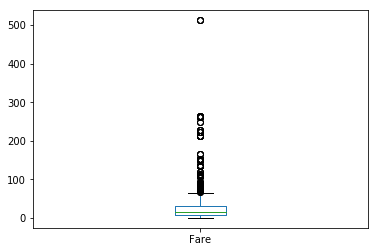

In [28]:
# box-whisker plot
df.Fare.plot(kind='box')

In [29]:
# categorical column : Counts
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [30]:
# categorical column : Proprotions
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [31]:
# apply on other columns
df[df.Survived != -888].Survived.value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [32]:
# count : Passenger class
df.Pclass.value_counts() 

3    709
1    323
2    277
Name: Pclass, dtype: int64

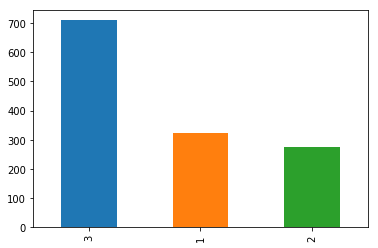

In [33]:
# visualize counts
df.Pclass.value_counts().plot(kind='bar')

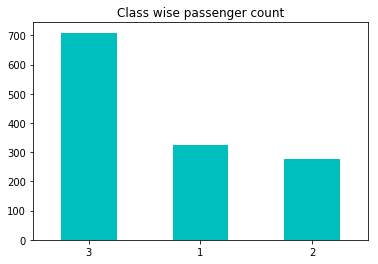

In [34]:
# title : to set title, color : to set color,  rot : to rotate labels 
df.Pclass.value_counts().plot(kind='bar',rot = 0, title='Class wise passenger count', color='c');

## Distributions

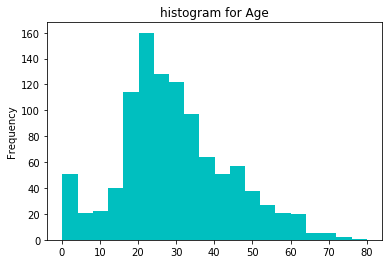

In [36]:
# Histogram plot of Age
df.Age.plot(kind='hist', title='histogram for Age', color='c', bins=20);

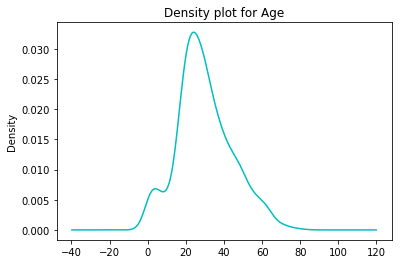

In [37]:
# Density plot for Age
df.Age.plot(kind='kde', title='Density plot for Age', color='c');

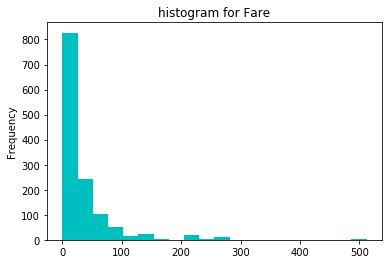

In [38]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', color='c', bins=20);

In [39]:
print('skewness for age : {0:.2f}'.format(df.Age.skew()))
print('skewness for fare : {0:.2f}'.format(df.Fare.skew()))

skewness for age : 0.41
skewness for fare : 4.37


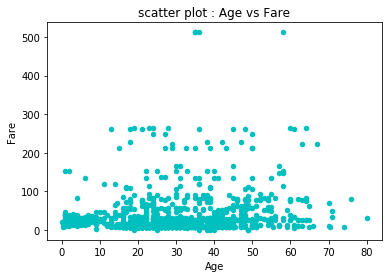

In [40]:
# Age vs Fare scatter plot
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

In [41]:
# Mean values of Age based on Gender
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [42]:
# Median values of Fare based on Passenger class
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [43]:
# Median values of Age based on Passenger class
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [44]:
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [45]:
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [46]:
aggregations = {
    'Fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}

In [47]:
df.groupby(['Pclass']).agg(aggregations)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [48]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [49]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [50]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Munging : Working with missing values

In [51]:
# use .info() to detect missing values (if any)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Feature : Embarked

In [52]:
# extract rows with Embarked as Null
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [53]:
# how many people embarked at different points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [54]:
# which embarked point has higher survival count
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [55]:
# explore the fare of each class for each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [56]:
# replace the missing values with 'C'
df.Embarked.fillna('C', inplace=True)

In [57]:
# check if any null value remaining
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [58]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Feature : Fare

In [59]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [61]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'),'Fare'].median()
print(median_fare)

8.05


In [62]:
df.Fare.fillna(median_fare, inplace=True)

In [63]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Feature : Age

In [64]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 15

In [65]:
# return null rows
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,-888,364498


####  replace with median age of gender

In [66]:
# median values
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

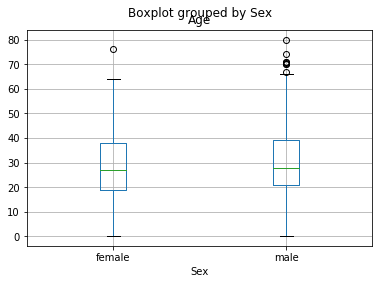

In [67]:
# visualize using boxplot
df[df.Age.notnull()].boxplot('Age','Sex');

#### option 2 : replace with median age of Pclass

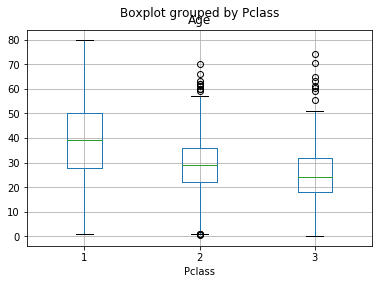

In [69]:
df[df.Age.notnull()].boxplot('Age','Pclass');

In [70]:
# replace : 
# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(pclass_age_median , inplace=True)

#### option 3 : replace with median age of title

In [71]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
                              ...                        
1303      Minahan, Mrs. William Edward (Lillian E Thorpe)
1304                       Henriksson, Miss. Jenny Lovisa
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [72]:
# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [74]:
df.Name.map(lambda x : GetTitle(x))

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
         ...  
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [75]:
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [76]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]



In [77]:
# create Title feature
df['Title'] =  df.Name.map(lambda x : GetTitle(x))

In [78]:
# head 
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


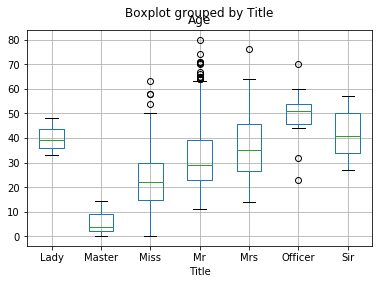

In [79]:
# Box plot of Age with title
df[df.Age.notnull()].boxplot('Age','Title');

In [80]:
# replace missing values
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median , inplace=True)

In [81]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


## Working with outliers

### Age

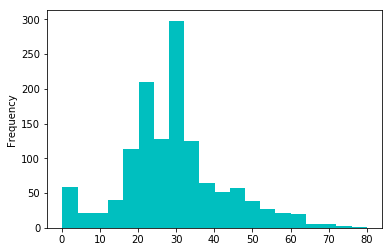

In [82]:
# use histogram to get understand the distribution
df.Age.plot(kind='hist', bins=20, color='c');

In [83]:
df.loc[df.Age > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


### Fare

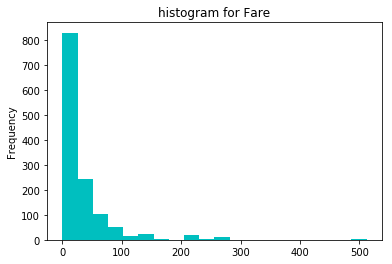

In [84]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

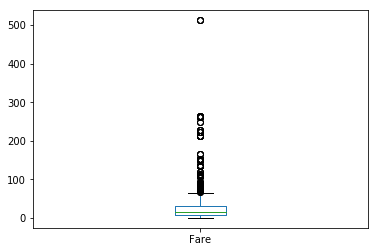

In [85]:
# box plot to indentify outliers 
df.Fare.plot(kind='box');

In [86]:
# look into the outliers
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


In [87]:
# Try some transformations to reduce the skewness
LogFare = np.log(df.Fare + 1.0) # Adding 1 to accomodate zero fares : log(0) is not defined

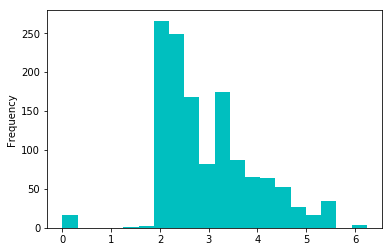

In [88]:
# Histogram of LogFare
LogFare.plot(kind='hist', color='c', bins=20);

In [89]:
# binning
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
              ...        
1303    (31.275, 512.329]
1304      (-0.001, 7.896]
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [90]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']) # discretization

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
          ...    
1303    very_high
1304     very_low
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

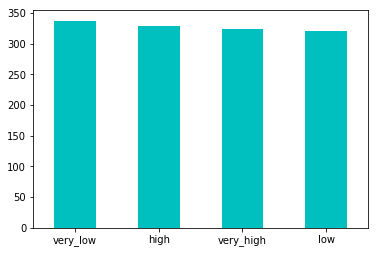

In [91]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [92]:
# create fare bin feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

## Feature Engineering

### Feature : Age State ( Adult or Child )

In [93]:
# AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult','Child')

In [94]:
# AgeState Counts
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [95]:
# crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


### Feature : FamilySize

In [96]:
# Family : Adding Parents with Siblings
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

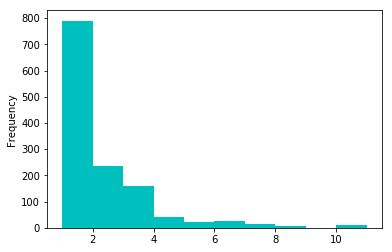

In [97]:
# explore the family feature
df['FamilySize'].plot(kind='hist', color='c');

In [98]:
# further explore this family with max family members
df.loc[df.FamilySize == df.FamilySize.max(),['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [99]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Feature : IsMother

In [100]:
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [101]:
# Crosstab with IsMother
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


### Deck

In [102]:
# explore Cabin values
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
6        NaN
7        E46
        ... 
1303     C78
1304     NaN
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [103]:
# use unique to get unique values for Cabin feature
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [104]:
# look at the Cabin = T
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [105]:
# set the value to NaN
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [106]:
# look at the unique values of Cabin again
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [107]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [108]:
# check counts
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [109]:
# use crosstab to look into survived feature cabin wise
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [110]:
# info command 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


### Categorical Feature Encoding

In [111]:
# sex
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [112]:
# columns Deck, Pclass, Title, AgeState
df = pd.get_dummies(df,columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

### Drop and Reorder Columns

In [115]:
# drop columns
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [116]:
# reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [117]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

## Save Processed Dataset

In [118]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [119]:
# train data
df.loc[df.Survived != -888].to_csv(write_train_path) 
# test data
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888, columns].to_csv(write_test_path) 

### Building the data processing script

In [120]:
get_processed_data_script_file = os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [121]:
%%writefile $get_processed_data_script_file
import numpy as np
import pandas as pd
import os

def read_data():
    # set the path of the raw data
    raw_data_path = os.path.join(os.path.pardir,'data','raw')
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    # read the data with all default parameters
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    test_df['Survived'] = -888
    df = pd.concat((train_df, test_df), axis=0)
    return df



def process_data(df):
    # using the method chaining concept
    return (df
         # create title attribute - then add this 
         .assign(Title = lambda x: x.Name.map(get_title))
         # working missing values - start with this
         .pipe(fill_missing_values)
         # create fare bin feature
         .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low','low','high','very_high']))
         # create age state
         .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult','Child'))
         .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
         .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0))
          # create deck feature
         .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin)) 
         .assign(Deck = lambda x : x.Cabin.map(get_deck))
         # feature encoding 
         .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1,0))
         .pipe(pd.get_dummies, columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])
         # add code to drop unnecessary columns
         .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1)
         # reorder columns
         .pipe(reorder_columns)
         )

def get_title(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def fill_missing_values(df):
    # embarked
    df.Embarked.fillna('C', inplace=True)
    # fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median , inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df 

    
def write_data(df):
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    # train data
    df[df.Survived != -888].to_csv(write_train_path) 
    # test data
    columns = [column for column in df.columns if column != 'Survived']
    df[df.Survived == -888][columns].to_csv(write_test_path) 

if __name__ == '__main__':
    df = read_data()
    df = process_data(df)
    write_data(df)

Overwriting ..\src\data\get_processed_data.py


In [122]:
!python $get_processed_data_script_file

..\src\data\get_processed_data.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat((train_df, test_df), axis=0)


In [123]:
train_df = pd.read_csv(write_train_path)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
PassengerId           891 non-null int64
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-